In [1]:
import os 
from tqdm import tqdm
from PIL import Image
import numpy as np

def extract_features(image_dir, output_file):
    feats = []
    files = sorted(os.listdir(image_dir))
    for fname in tqdm(files[:1000]):  # limit to 1000 images for demo
        path = os.path.join(image_dir, fname)
        img = Image.open(path).convert('RGB')
        feats.append(img)
    feats = np.array(feats)
    np.save(output_file, feats)
    print(f"✅ Saved {feats.shape} to {output_file}")


for i in range(1, 11):
    real_dir = "cifake/train/REAL/cat_" + str(i).zfill(2) 
    fake_dir = "cifake/train/FAKE/cat_" + str(i).zfill(2) 
    # Extract and save
    extract_features(real_dir, "real_features_no_process" + str(i).zfill(2) + ".npy")
    extract_features(fake_dir, "fake_features_no_process" + str(i).zfill(2) + ".npy")


100%|██████████| 1000/1000 [00:00<00:00, 12613.58it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 19690.74it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 20358.23it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 20361.00it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 20792.50it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 20123.90it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 21377.70it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 21041.27it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 20648.37it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 18865.64it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 19383.35it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 20002.50it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 20181.42it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 20974.25it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 21531.33it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 18698.53it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 20022.36it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 18626.45it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 20324.49it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process10.npy


100%|██████████| 1000/1000 [00:00<00:00, 17457.06it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process10.npy


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 2. Load Feature Vectors
# ==========================
# Load the features you previously extracted with ResNet18
m = 5

real_feats_list = np.array([np.load("real_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)])
fake_feats_list = np.array([np.load("fake_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)])

real_list = np.array([[item.flatten() for item in cat] for cat in real_feats_list]) # only if using unreduced
fake_list = np.array([[item.flatten() for item in cat] for cat in fake_feats_list])

real_feats = np.concatenate(real_list)
fake_feats = np.concatenate(fake_list)
print(real_feats.shape)

(5000, 3072)


In [3]:
U_real, S_real, V_real = np.linalg.svd(real_feats, full_matrices=False)
U_fake, S_fake, V_fake = np.linalg.svd(fake_feats, full_matrices=False)

In [4]:
tol = 10
# S_real[abs(S_real) < tol] = 0.0
# S_fake[abs(S_fake) < tol] = 0.0
# print(np.linalg.matrix_rank(real_feats, tol=tol))
# print(np.linalg.matrix_rank(fake_feats, tol=tol))

3056


[]

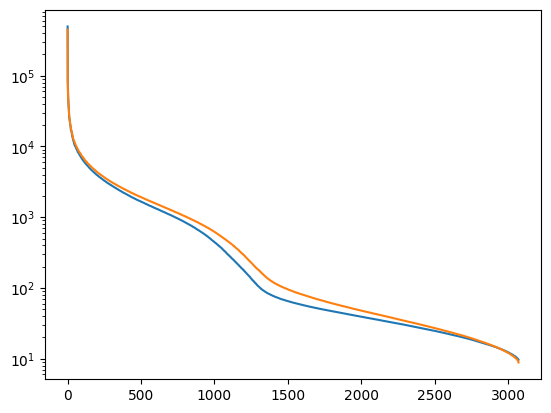

In [5]:
plt.plot(S_real)
plt.plot(S_fake)
plt.semilogy()

In [6]:
U_real.shape, S_real.shape, V_real.shape

((5000, 3072), (3072,), (3072, 3072))

In [7]:
np.abs((U_real@np.diag(S_real)@V_real ) - real_feats).all() < 1e-6

np.True_

Average local ID  (real): 15.632
Average local ID (fake): 15.3852


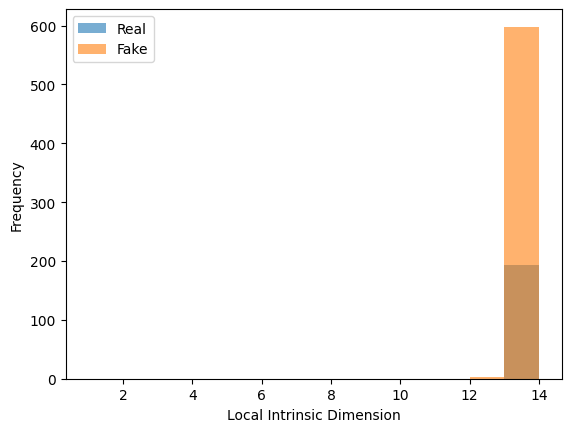

In [8]:
# -----------------------------------------------------------
#  Local Intrinsic Dimension via local PCA
#  Requirements: numpy, scikit-learn
# -----------------------------------------------------------
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

def local_intrinsic_dimension(X, k=20, var_threshold=0.95, sample_size=None, seed=0):
    """
    Estimate intrinsic dimension at each point using local PCA.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Feature matrix (e.g. ResNet or VGG embeddings).
    k : int
        Number of nearest neighbours that form the local patch.
    var_threshold : float
        Fraction of variance we want PCA to explain.
    sample_size : int or None
        If set, randomly subsample points to speed up computation.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    ids : ndarray, shape (n_used_points,)
        Local intrinsic dimension estimate for every processed point.
    """
    rng = np.random.default_rng(seed)

    # Optionally subsample points for speed
    if sample_size is not None and sample_size < len(X):
        indices = rng.choice(len(X), size=sample_size, replace=False)
        X_use = X[indices]
    else:
        X_use = X

    # Fit neighbour index on ALL points so neighbours come from full set
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
    _, idx = nbrs.kneighbors(X_use)      # idx shape: (n_use, k)

    ids = []
    for inds in idx:
        patch = X[inds]
        pca = PCA().fit(patch)
        cumsum = np.cumsum(pca.explained_variance_ratio_)
        # Number of components needed to reach the variance threshold
        d = np.searchsorted(cumsum, var_threshold) + 1
        ids.append(d)

    return np.array(ids)

# -----------------------------------------------------------
#  EXAMPLE USAGE
# -----------------------------------------------------------
# real_feats = np.load("real_features_resnet18.npy")   # (N, 512)
# fake_feats = np.load("fake_features_resnet18.npy")

id_real = local_intrinsic_dimension(real_feats, k=20, var_threshold=0.95)
id_fake = local_intrinsic_dimension(fake_feats, k=20, var_threshold=0.95)

print("Average local ID  (real):", id_real.mean())
print("Average local ID (fake):", id_fake.mean())

# Optional: visualise distribution
import matplotlib.pyplot as plt
plt.hist(id_real, bins=range(1, 15), alpha=0.6, label="Real")
plt.hist(id_fake, bins=range(1, 15), alpha=0.6, label="Fake")
plt.xlabel("Local Intrinsic Dimension")
plt.ylabel("Frequency")
plt.legend(); plt.show()

In [9]:
S_real_reduced = np.concatenate((S_real[:16], np.zeros((len(S_real)-16))))
real_reduced = U_real@np.diag(S_real_reduced)@V_real
print(real_reduced)

[[228.15630002 228.91265891 229.17586789 ... 211.93410126 210.0472093
  210.12056752]
 [126.06772715 122.02103774 119.02440746 ... 140.03698377 133.24335924
  128.43775198]
 [187.25697508 178.2746145  122.17708878 ... 115.24812987 101.63134929
   36.41805898]
 ...
 [132.34250289 138.67548315 106.74977629 ... 156.17062007 154.81839278
  109.53509232]
 [169.78169278 153.1354833  136.17836544 ... 207.17590877 190.55607075
  176.19847353]
 [102.07113787  73.81954816  52.79902239 ... 149.70281027 123.41453104
  109.35090694]]


In [14]:
import matplotlib.pyplot as plt 


%matplotlib notebook

x_real = V_real[0]
y_real = V_real[1]
z_real = V_real[2]
fig = plt.figure()
xyz = fig.add_subplot(projection='3d')
xyz.scatter(x_real, y_real, z_real, marker='.')
x_fake = V_fake[0]
y_fake = V_fake[1]
z_fake = V_fake[2]
xyz.scatter(x_fake, y_fake, z_fake, marker='.')

<IPython.core.display.Javascript object>